In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from tqdm import tqdm

In [17]:
dataset_path = '/kaggle/input/liver-histopathology-fibrosis-ultrasound-images/Dataset/Dataset'

# Check structure
for root, dirs, files in os.walk(dataset_path):
    print(f"Found {len(files)} images in: {root}")
    print(f"Classes: {dirs}")
    break  # Only print the top level

Found 0 images in: /kaggle/input/liver-histopathology-fibrosis-ultrasound-images/Dataset/Dataset
Classes: ['F0', 'F1', 'F4', 'F3', 'F2']


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


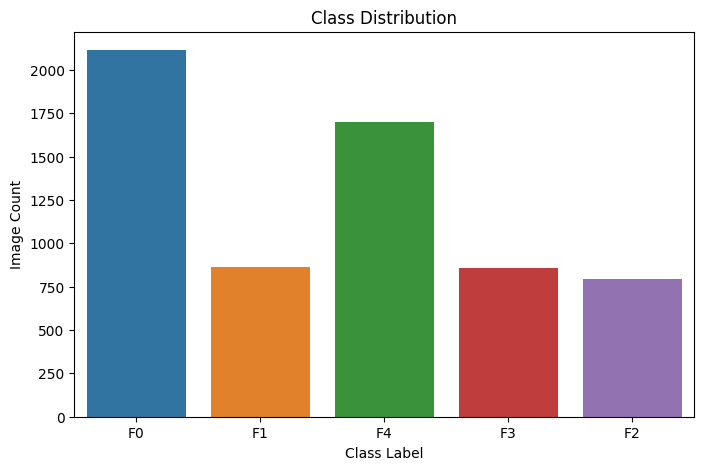

In [18]:
class_counts = {}
for class_dir in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_dir)
    if os.path.isdir(class_path):
        class_counts[class_dir] = len(os.listdir(class_path))

# Plot class distribution
plt.figure(figsize=(8,5))
sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))
plt.title("Class Distribution")
plt.ylabel("Image Count")
plt.xlabel("Class Label")
plt.show()


Avg Width: 553.49, Avg Height: 472.75
Channels: {1, 3}


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


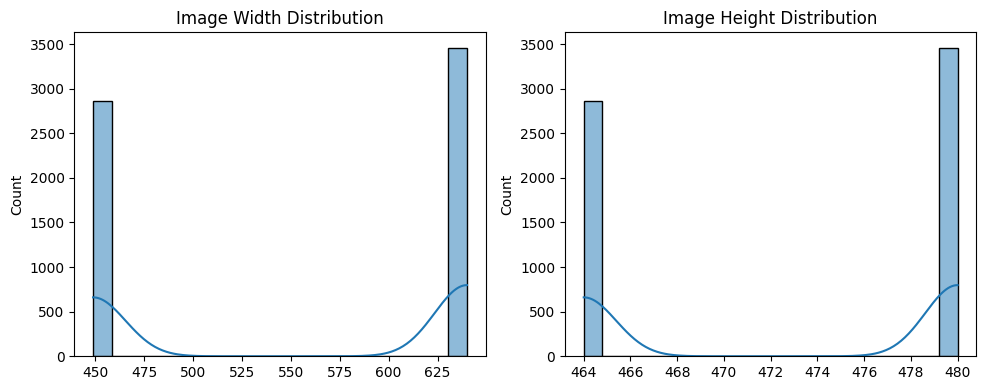

In [19]:
image_shapes = []
channels = []

for class_dir in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path)
        image_shapes.append(img.size)  # (width, height)
        channels.append(len(img.getbands()))  # RGB = 3, Grayscale = 1

# Shape stats
widths, heights = zip(*image_shapes)
print(f"Avg Width: {np.mean(widths):.2f}, Avg Height: {np.mean(heights):.2f}")
print(f"Channels: {set(channels)}")

# Visualize
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.histplot(widths, bins=20, kde=True)
plt.title("Image Width Distribution")
plt.subplot(1, 2, 2)
sns.histplot(heights, bins=20, kde=True)
plt.title("Image Height Distribution")
plt.tight_layout()
plt.show()


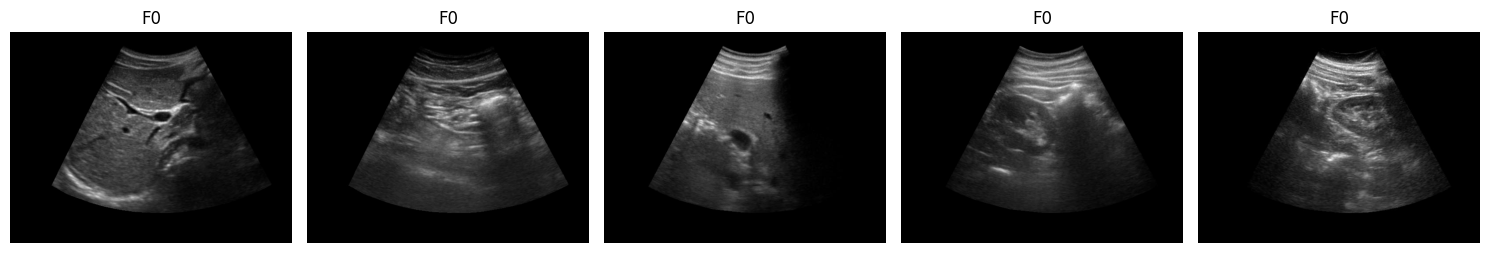

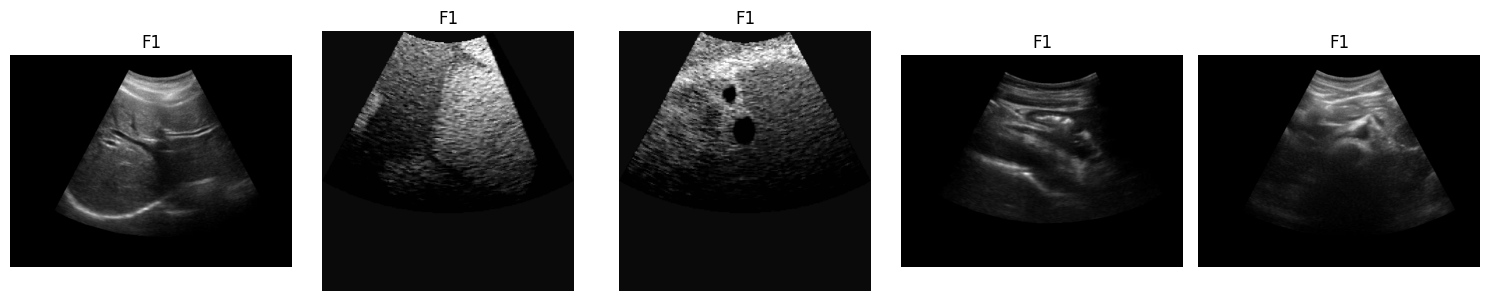

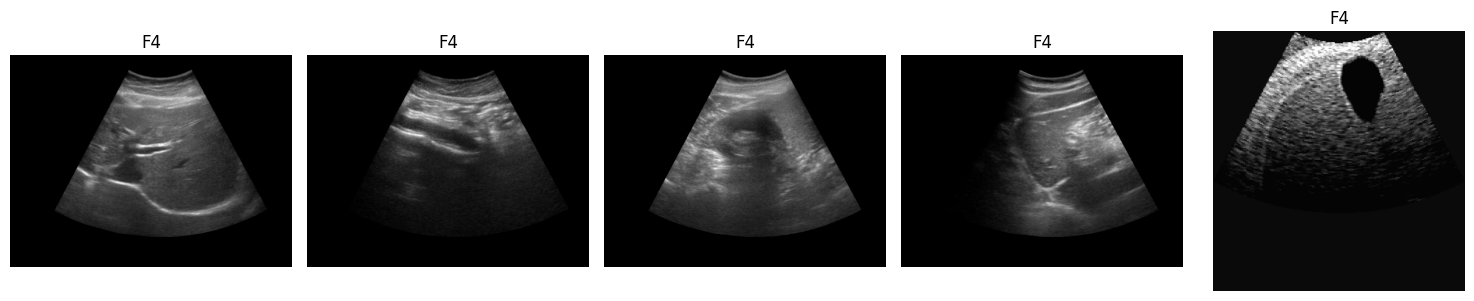

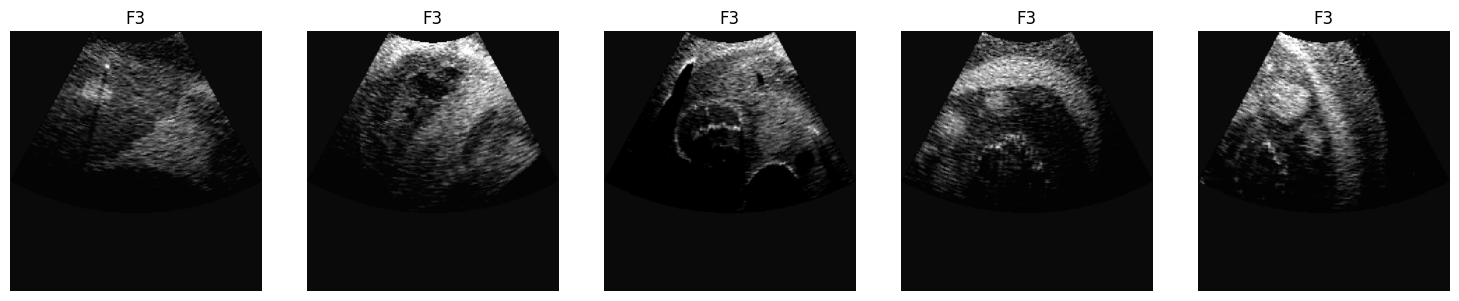

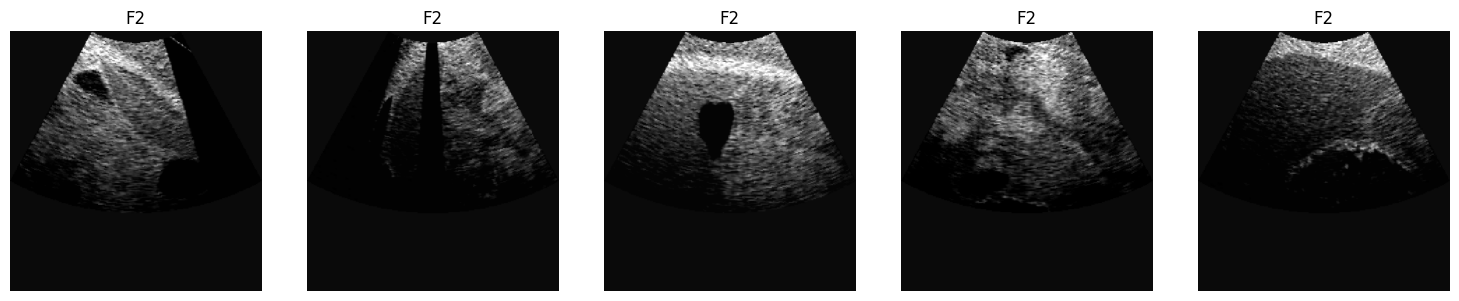

In [20]:
def show_images_grid(class_name, n=5):
    path = os.path.join(dataset_path, class_name)
    imgs = os.listdir(path)[:n]
    plt.figure(figsize=(15, 3))
    for i, img_file in enumerate(imgs):
        img_path = os.path.join(path, img_file)
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img, cmap='gray')
        plt.title(f"{class_name}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Display images from each class
for class_dir in class_counts:
    show_images_grid(class_dir)


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


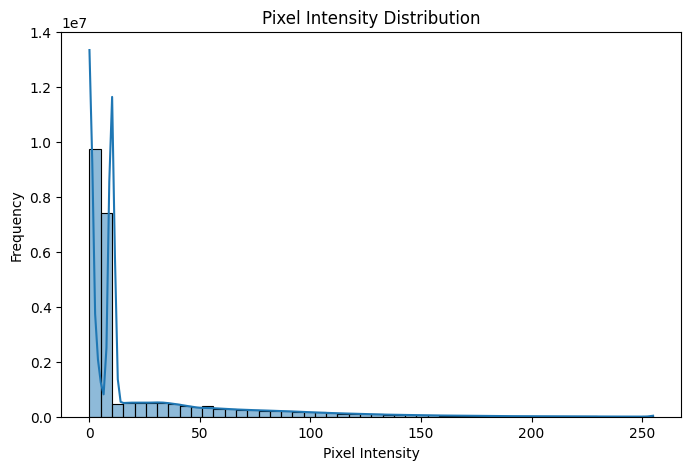

In [21]:
sample_pixels = []

for class_dir in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_dir)
    for img_file in os.listdir(class_path)[:20]:  # Sample 20 images per class
        img_path = os.path.join(class_path, img_file)
        img = Image.open(img_path).convert("L")
        sample_pixels.extend(np.array(img).flatten())

plt.figure(figsize=(8, 5))
sns.histplot(sample_pixels, bins=50, kde=True)
plt.title("Pixel Intensity Distribution")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


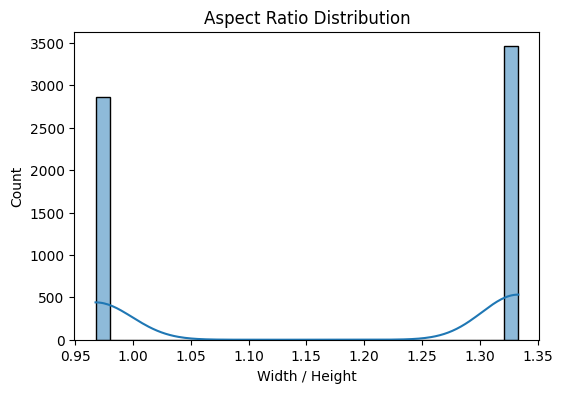

In [47]:
aspect_ratios = [w/h for w, h in image_shapes]

plt.figure(figsize=(6, 4))
sns.histplot(aspect_ratios, bins=30, kde=True)
plt.title("Aspect Ratio Distribution")
plt.xlabel("Width / Height")
plt.ylabel("Count")
plt.show()
